In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()


Saving AdidasSalesdata.xlsx to AdidasSalesdata.xlsx


In [5]:
df = pd.read_excel('AdidasSalesdata.xlsx')
print(df.to_string())

           Retailer  Retailer ID Invoice Date     Region           State            City Gender Type   Product Category  Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin Sales Method
0       Foot Locker      1185732   2021-10-26  Northeast    Pennsylvania    Philadelphia         Men            Apparel              55         125      68750.0          24062.50              0.35       Outlet
1       Foot Locker      1185732   2021-10-27  Northeast    Pennsylvania    Philadelphia       Women            Apparel              45         225     101250.0          30375.00              0.30       Outlet
2       Foot Locker      1185732   2021-10-28  Northeast    Pennsylvania    Philadelphia         Men    Street Footwear              45         475     213750.0         117562.50              0.55       Outlet
3       Foot Locker      1185732   2021-10-29  Northeast    Pennsylvania    Philadelphia         Men  Athletic Footwear              45         125      56250.0

In [6]:
category_profit = df.groupby('Product Category').agg({
    'Operating Profit': 'sum',
    'Total Sales': 'sum'}).reset_index()
category_profit['Profit Margin (%)'] = (category_profit['Operating Profit'] / category_profit['Total Sales']) * 100
print(category_profit)

    Product Category  Operating Profit  Total Sales  Profit Margin (%)
0            Apparel      1.134140e+08  302767492.0          37.459108
1  Athletic Footwear      9.082267e+07  260305576.0          34.890790
2    Street Footwear      1.278981e+08  336829057.0          37.971216


In [7]:
region_profit = df.groupby('Region').agg({
    'Operating Profit': 'sum',
    'Total Sales': 'sum'}).reset_index()
region_profit['Profit Margin (%)'] = (region_profit['Operating Profit'] / region_profit['Total Sales']) * 100
print(region_profit)

      Region  Operating Profit  Total Sales  Profit Margin (%)
0    Midwest       52811346.48  135800459.0          38.888931
1  Northeast       68020587.65  186324067.0          36.506603
2      South       61138004.07  144663181.0          42.262311
3  Southeast       60555416.70  163171236.0          37.111576
4       West       89609406.55  269943182.0          33.195655


<ipython-input-8-60048f802135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_profit, x='Product Category', y='Profit Margin (%)', palette='viridis')


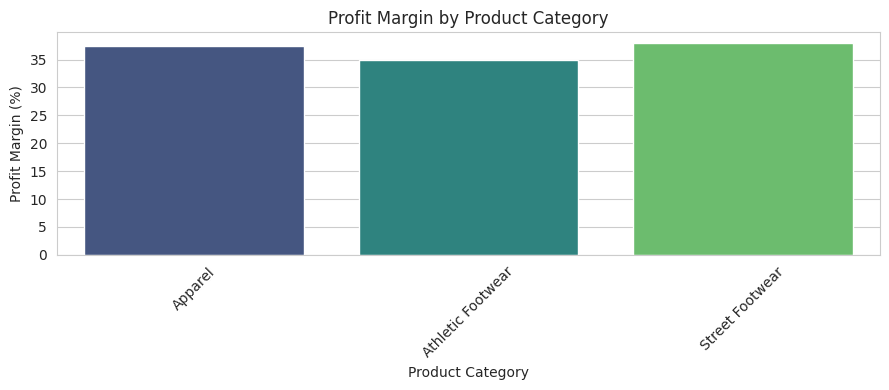

In [8]:
plt.figure(figsize=(9,4))
sns.barplot(data=category_profit, x='Product Category', y='Profit Margin (%)', palette='viridis')
plt.title('Profit Margin by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-98b170aea31d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_profit, x='Region', y='Profit Margin (%)', palette='coolwarm')


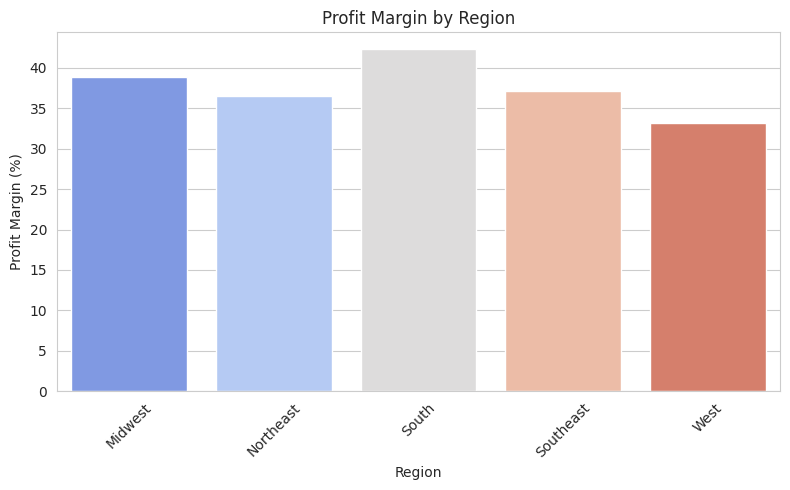

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=region_profit, x='Region', y='Profit Margin (%)', palette='coolwarm')
plt.title('Profit Margin by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df['YearMonth'] = df['Invoice Date'].dt.to_period('M')
city_monthly_sales = df.groupby(['City', 'YearMonth'])['Total Sales'].sum().reset_index()

early_months = city_monthly_sales['YearMonth'].min()
late_months = city_monthly_sales['YearMonth'].max()

early_sales = city_monthly_sales[city_monthly_sales['YearMonth'] <= early_months + 2]
late_sales = city_monthly_sales[city_monthly_sales['YearMonth'] >= late_months - 2]

early_sales_sum = early_sales.groupby('City')['Total Sales'].sum()
late_sales_sum = late_sales.groupby('City')['Total Sales'].sum()

city_growth = pd.DataFrame({
    'Early Sales': early_sales_sum,
    'Late Sales': late_sales_sum
}).dropna()

city_growth['Growth (%)'] = ((city_growth['Late Sales'] - city_growth['Early Sales']) / city_growth['Early Sales']) * 100
city_growth = city_growth.sort_values(by='Growth (%)', ascending=False)

<ipython-input-11-17634f82587d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Growth (%)', palette='magma')


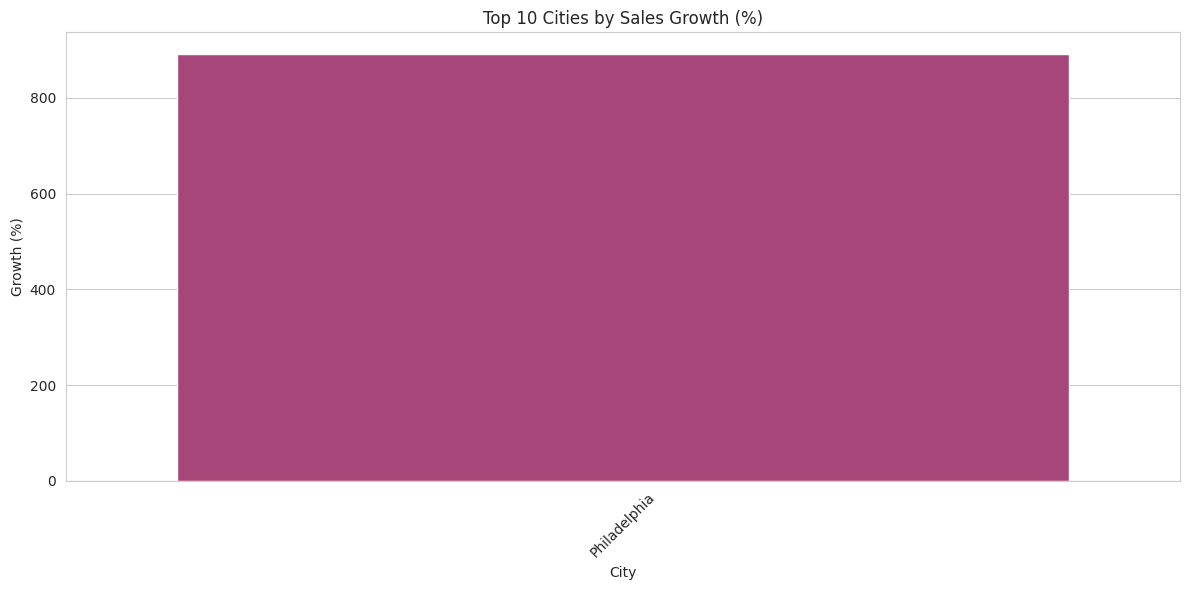

In [11]:
plt.figure(figsize=(12,6))
top_cities = city_growth.head(10).reset_index()
sns.barplot(data=top_cities, x='City', y='Growth (%)', palette='magma')
plt.title('Top 10 Cities by Sales Growth (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

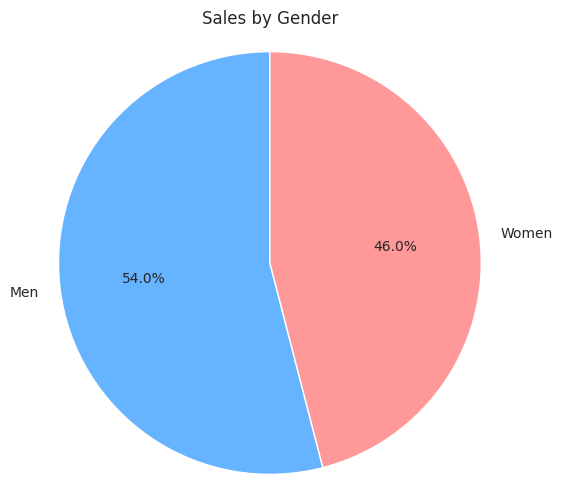

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
gender_sales = df.groupby('Gender Type')['Total Sales'].sum()
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
ax1.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.title('Sales by Gender')
plt.show()

